In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
#if IN_COLAB:
#    !pip install zfit
import math
from pylab import figure, cm
from scipy import integrate, stats

# Exercise

We are monitoring the activity level of a nuclear power plant, by measuring at regular time intervals $\Delta t$ the flux $\phi$ of emitted neutrons with a counter. In normal regime, the average number of counts is constant, with a nominal value $\phi_0$, known with good precision. It is important to make sure the reaction doesn't cross the threshold of criticity, meaning that the flux doesn't rise, that would translate in an exponential growth in time of the recorded flux.

We take the $N$ most recent flux measurements, build a statistic and then a Maximum Local Power test for small values of the exponential growth rate (this way as soon as the criticity level is crossed we are alerted).

### Hypothesis 0
$H_0$: we have $N$ poissonian distributions with known mean $\phi_0$.

### Compound hypothesis 
$H_\lambda$: we have $N$ poissonian distributions with mean rising as
$\phi(t)=\phi_0 e^{\lambda t}.
$

In the compund hypothesis the Likelihood is
$$
\mathcal{L}(\lambda)=\prod_{j=1}^N \frac{n_j e^{-\mu_j}}{n_j!}\textrm{, with } \mu_j=\phi_0 e^{\lambda j \Delta t}\textrm{ where } \Delta t=t_j-t_{j-1}
$$

The MLP test is
$$
s=\left[\frac{\partial  \ln\mathcal{L}}{\partial \lambda}\right]_{\lambda=0}=\Delta t\sum_{j=1}^n n_{j}j-\phi_0\Delta t \sum_{j=1}^nj>c_{\alpha}
$$

and taking out addition and multiplication constant we obtain
$$
\tilde{s}= \sum_{j=1}^n n_{j}j
$$

which ias asympotically Gaussian distributed with
- Hypothesis 0: $\mu_{0}=\phi_{0}\frac{N(N+1)}{2}$ and $\sigma_{0}^2=\phi_{0}\frac{N(N+1)(2N+1)}{6}$
- Hypothesis $\lambda$: $\mu_\lambda=\mu_{0}+\lambda\Delta t\sum_{j=1}^n j^2$ and $\sigma_{\lambda}^2=\sigma_{0}^2+\lambda\phi_0\Delta t\sum_{j=1}^n j^3$

In order to $H_0$ to be rejected we need to impose
$$
\int_{c_\alpha}^{+\infty}\textrm{Gauss}(\mu_0,\sigma_0)=\alpha,
$$
thus obtaing the threshold value $c_\alpha$ for our test statistic $\tilde{s}$.

Let's see some examples.

False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
False alarm
alpha: 0.16%


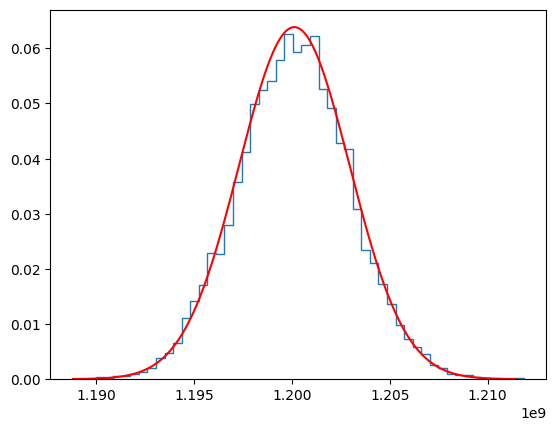

In [29]:
phi_0 = 24
N = 10000
mu = phi_0*N*(N+1)/2
var = phi_0*N*(N+1)*(2*N+1)/6
iterations = 10000
threshold = stats.norm.ppf(0.999, loc=mu, scale=np.sqrt(var)) #<0.1% false alarm
count_falsealarm=0
test_array = np.zeros(iterations)
for itern in range(iterations):
    sample = np.random.poisson(lam=phi_0, size=N)
    weights = np.arange(1, N+1, 1)
    test_array[itern]=np.sum(sample*weights)
    #print(test)
    if (test_array[itern] > threshold):
        count_falsealarm += 1
        print("False alarm")
        

alpha = count_falsealarm / iterations
print(f'==============\nalpha: {alpha*100:.2f}%')

counts, bins = np.histogram(test_array, bins=50)
plt.stairs(counts/iterations, bins)
x = np.linspace(mu-4*np.sqrt(var), mu+4*np.sqrt(var), 1000)
plt.plot(x, (-(mu-4*np.sqrt(var))+ mu+4*np.sqrt(var))*stats.norm.pdf(x, mu, np.sqrt(var))/50, c='r')

### Power
We can compute the power as the integral between $[c_\alpha, +\infty]$ of the test hypothesis distribution under the assumption of $H_\lambda$.

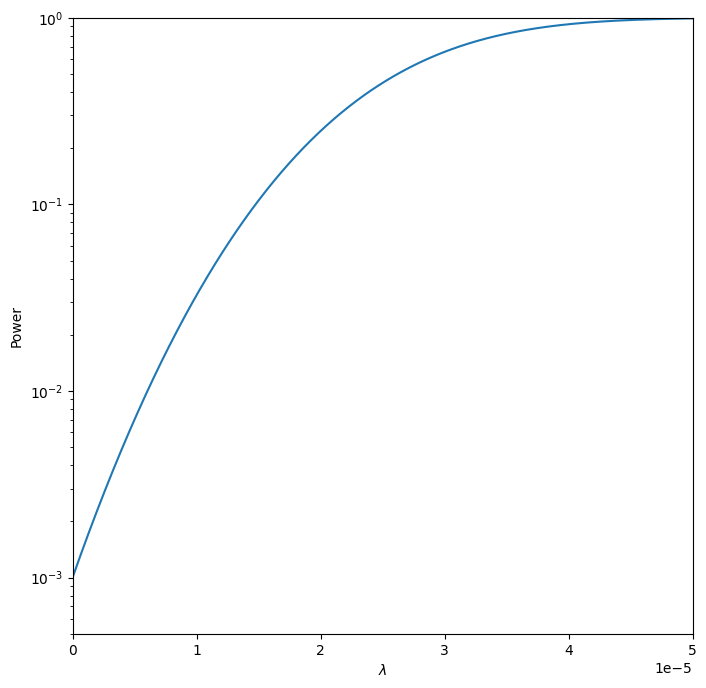

In [58]:
lambda_par=np.linspace(0,0.00005, 1000)
delta_t=1
power=np.zeros(lambda_par.size)
for lamb in lambda_par:
    mu_l = mu + lamb * delta_t * N*(N+1)*(2*N+1)/6
    var_l = var + lamb * phi_0 * delta_t * ((N*(N+1)/2)**2)
    power[np.where(lambda_par==lamb)[0][0]] = 1 - stats.norm.cdf(threshold, loc=mu_l, scale=np.sqrt(var_l))
    
plt.figure(figsize=(8, 8))
plt.xlabel("$\lambda$")
plt.ylabel("Power")
plt.xlim(0.0, max(lambda_par))
plt.ylim(0.0005, 1)
plt.yscale('log')
plt.plot(lambda_par, power)

power: 0.40
power: 1.00
power: 1.00


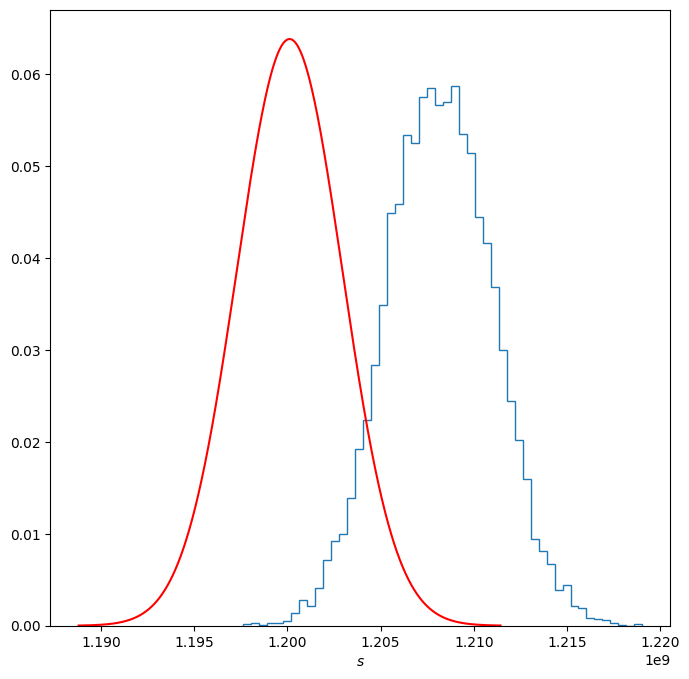

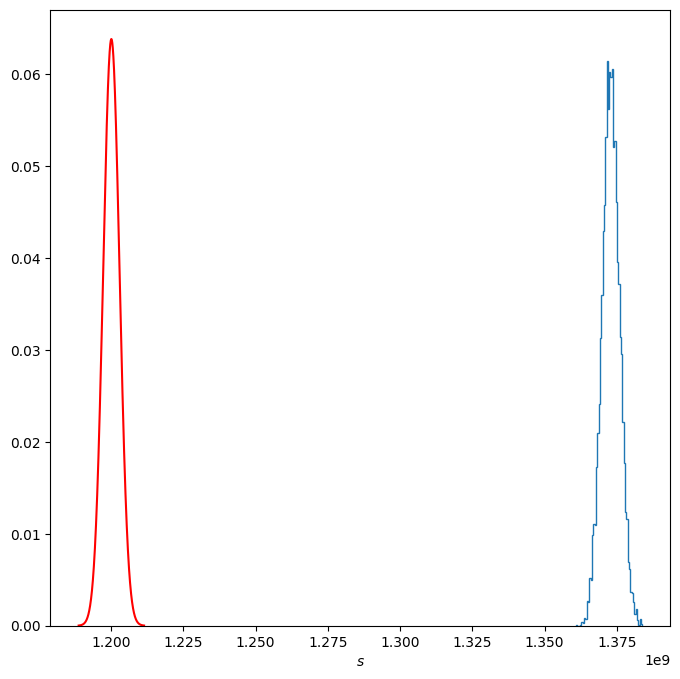

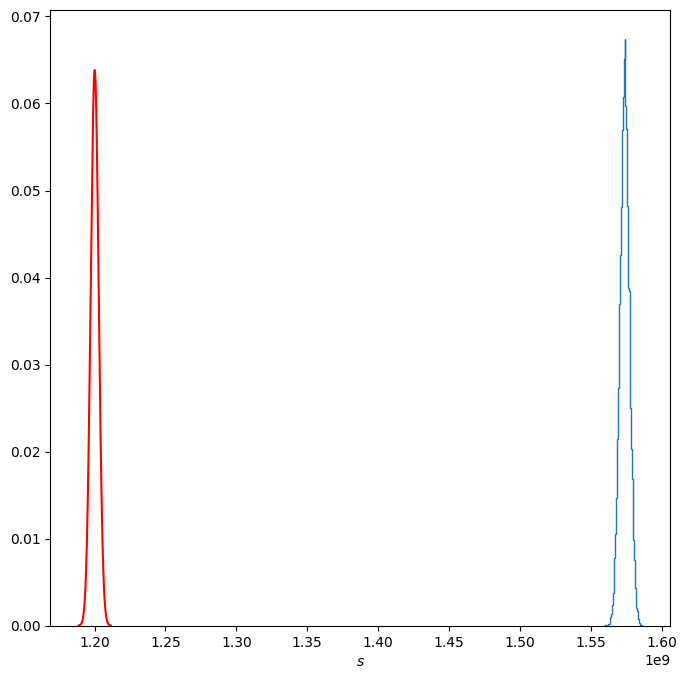

In [72]:
for lamb in [1e-6, 2e-5, 4e-5]:
    test_array = np.zeros(iterations)
    count_falsenegative=0
    for itern in range(iterations):
        weights = np.arange(1, N+1, 1)
        sample = np.random.poisson(lam=phi_0*np.exp(lamb*delta_t*weights), size=N)
        #print(sample)
        test_array[itern]=np.sum(sample*weights)
        #print(test)
        if (test_array[itern] < threshold):
            count_falsenegative += 1
            #print("False alarm")
    power = 1 - count_falsenegative / iterations
    print(f'==============\npower: {power:.2f}')
    plt.figure(figsize=(8, 8))
    plt.xlabel("$s$")
    counts, bins = np.histogram(test_array, bins=50)
    plt.stairs(counts/iterations, bins)
    x = np.linspace(mu-4*np.sqrt(var), mu+4*np.sqrt(var), 1000)
    plt.plot(x, (-(mu-4*np.sqrt(var))+ mu+4*np.sqrt(var))*stats.norm.pdf(x, mu, np.sqrt(var))/50, c='r')